In [1]:
import sys
sys.path.append('../src')

In [2]:
from metrics import calculate_false_alarm, calculate_delay, calculate_precision, compute_metrics
from loading import *
from visualization import *
from features import *
from helpers import *

from matplotlib import pyplot as plt
%matplotlib inline

# Extract metrics for feature according to threshold value

In [3]:
data_path = "../data/"
patient_data = load_patient_seizures(data_path, 2,all_seizures=True, delta=1)

Seizure starts (s):  [[824604.12214844]
 [837451.78589844]]
Seizure ends (s):  [[824690.37769531]
 [837541.65542969]]
Duration (s):  [[86.25554687]
 [89.86953125]]
Sampled frequency (Hz):  512
Start/end [824604.12214844] [824690.37769531]
Start/end [837451.78589844] [837541.65542969]
EEG files:  [['../data/ID02/ID02_229h.mat', '../data/ID02/ID02_230h.mat', '../data/ID02/ID02_231h.mat'], ['../data/ID02/ID02_232h.mat', '../data/ID02/ID02_233h.mat', '../data/ID02/ID02_234h.mat']]
Hour of seizure:  [array([229, 230, 231]), array([232, 233, 234])]
Samples ranges:  [(104510, 148673), (1152914, 1198927)]


In [4]:
eegs = patient_data['eegs']
ranges = patient_data['ranges']
seizure_start_s = patient_data["infos"]["seizure_start"]
seizure_end_s = patient_data["infos"]["seizure_end"] 

In [5]:
max_power_eeg = top_signals(eegs, ranges, top=1, id_seizure = None)

## Convert seizure sample ranges into sliding window ranges

In [6]:
window_size = 128
step_size = 64

In [7]:
indexes = convert_sample_ranges_to_window_ranges(ranges,window_size,step_size,1843200)

# Computing signal energy with window

In [8]:
energy_feature_signals = calculate_feature(eegs, max_power_eeg[0], window_size, step_size, calculate_energy)

In [9]:
line_length_feature_signals = calculate_feature(eegs, max_power_eeg[0], window_size, step_size, calculate_line_length)

In [10]:
moving_avg_feature_signals = calculate_feature(eegs, max_power_eeg[0], window_size, step_size, calculate_moving_avg)

In [11]:
all_data_window_ranges, all_data_energy = merge_all_data(energy_feature_signals, indexes)
all_data_window_ranges, all_data_line_length = merge_all_data(line_length_feature_signals, indexes)
all_data_window_ranges, all_data_moving_avg = merge_all_data(moving_avg_feature_signals, indexes)

## Plotting the results

### Energy feature

time 113497
data 172794


[]

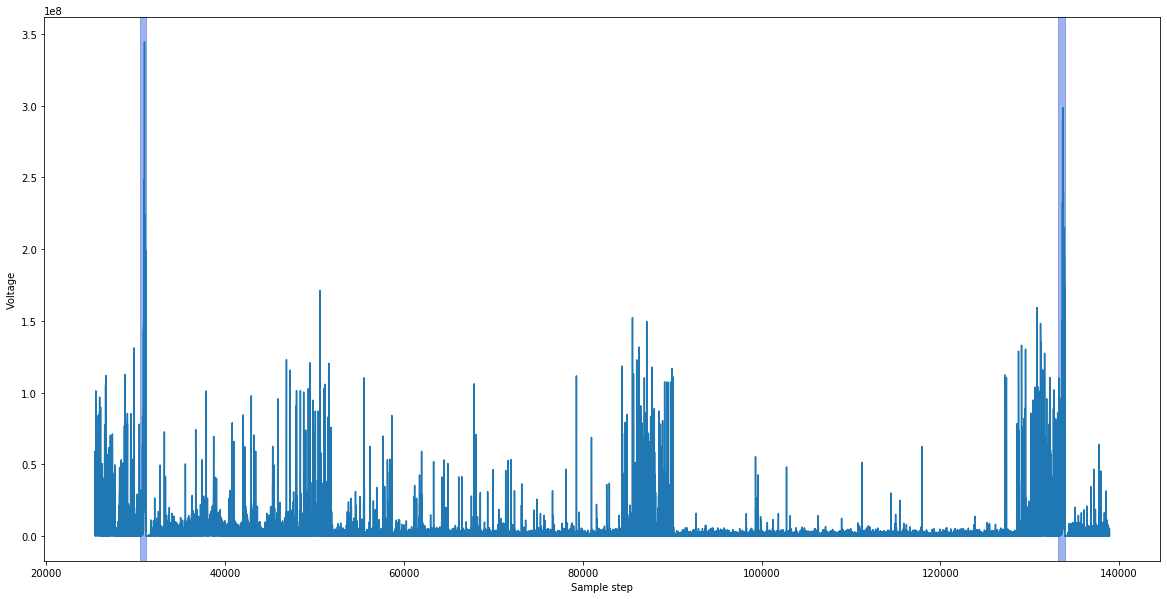

In [12]:
plot_one_signal(all_data_energy , all_data_window_ranges, 10000)

### Line length feature

time 113497
data 172794


[]

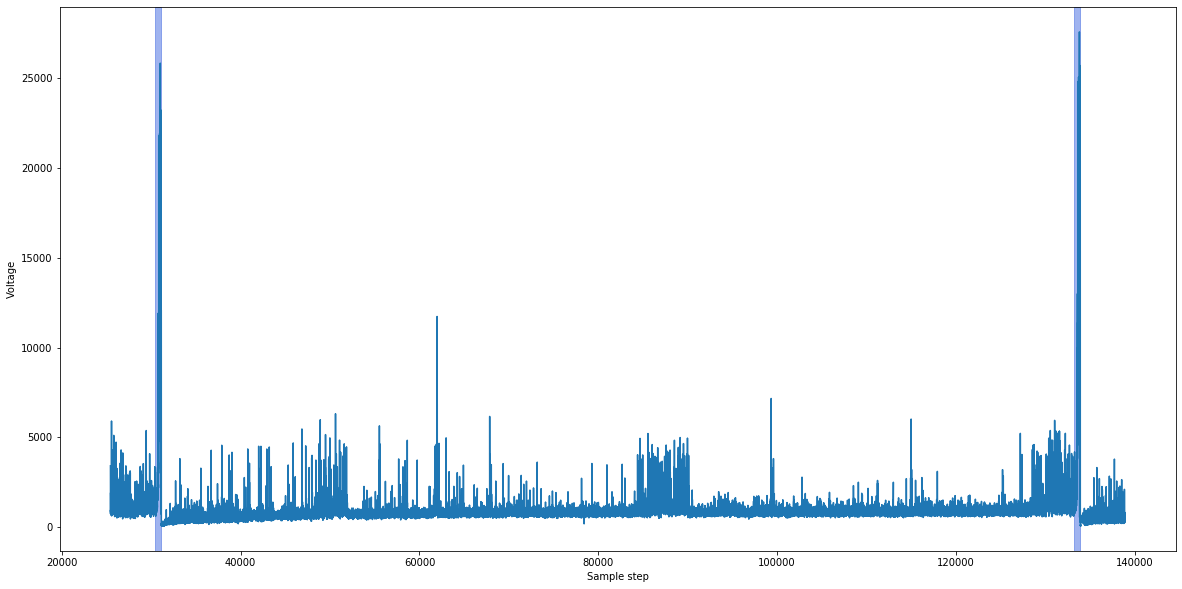

In [13]:
plot_one_signal(all_data_line_length , all_data_window_ranges, 10000)

### Moving AVG feature

time 113497
data 172794


[]

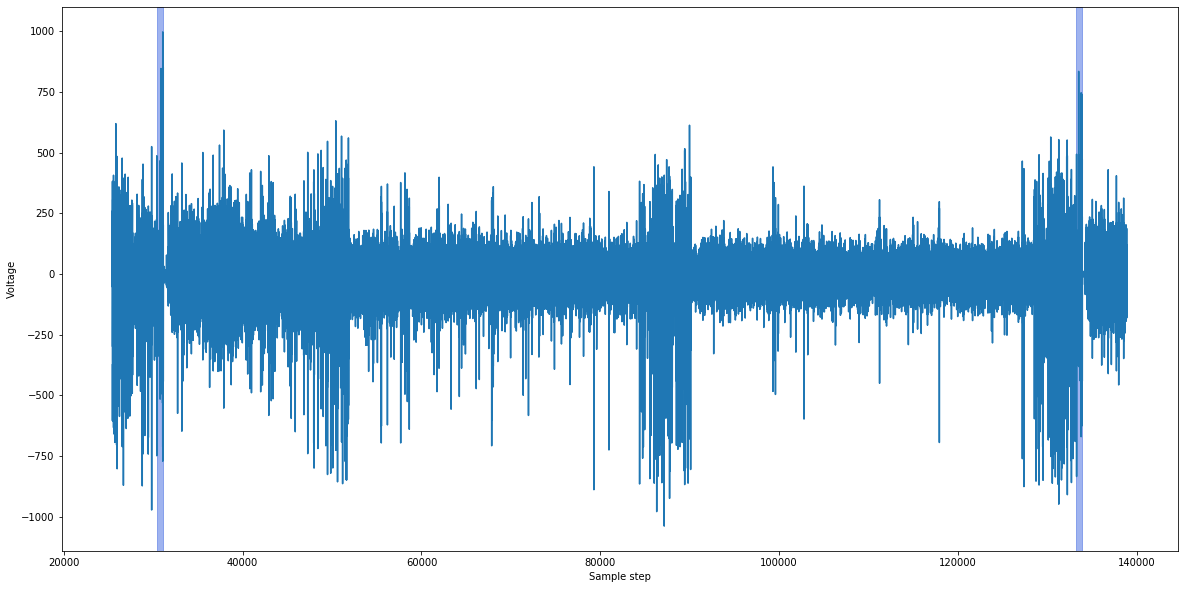

In [14]:
plot_one_signal(all_data_moving_avg , all_data_window_ranges, 10000)

# Plotting real signal and computed energy signal

In [15]:
energy_seizure1_single = energy_feature_signals[0][1]
energy_seizure1_single_scaled = scale_signal(energy_seizure1_single, 128, 64)

In [16]:
line_length_seizure1_single = line_length_feature_signals[0][1]
line_length_seizure1_single_scaled = scale_signal(line_length_seizure1_single, 128, 64)

In [17]:
moving_avg_seizure1_single = moving_avg_feature_signals[0][1]
moving_avg_seizure1_single_scaled = scale_signal(moving_avg_seizure1_single, 128, 64)

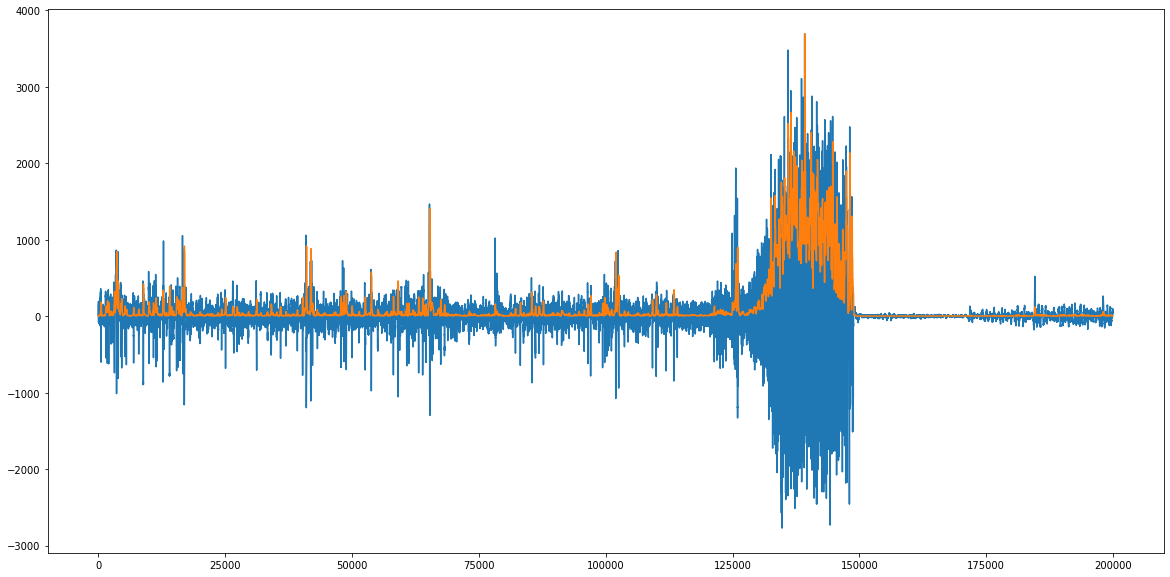

In [18]:
plt.figure(figsize=(20,10))
real_signal = eegs[0][1][max_power_eeg].T
plt.plot(real_signal[:200000])
plt.plot(energy_seizure1_single_scaled[:200000]/np.max(energy_seizure1_single_scaled)*np.max(real_signal))

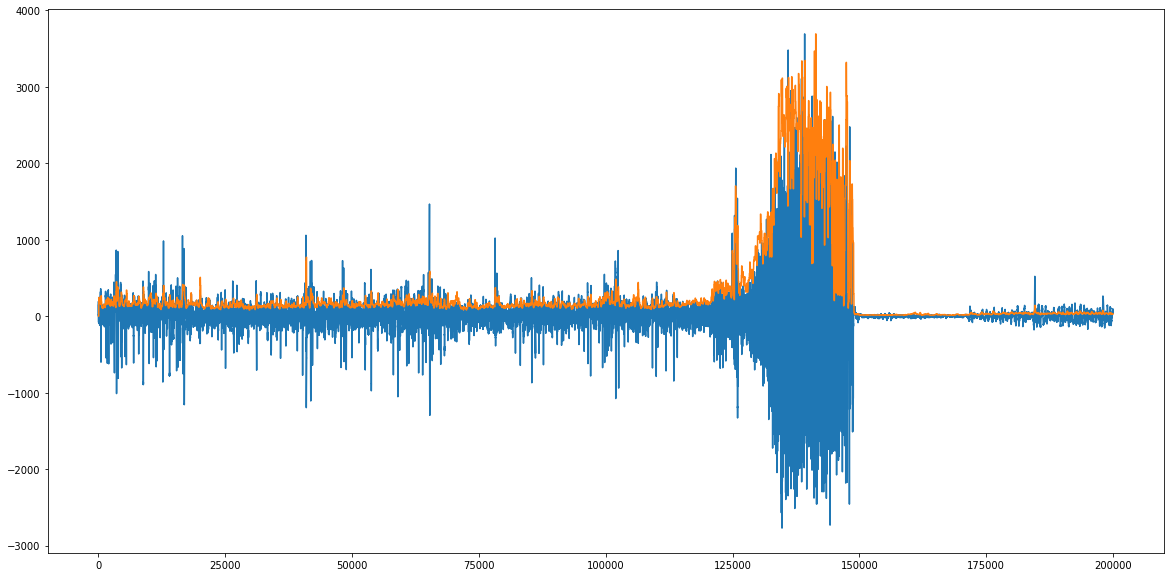

In [19]:
plt.figure(figsize=(20,10))
real_signal = eegs[0][1][max_power_eeg].T
plt.plot(real_signal[:200000])
plt.plot(line_length_seizure1_single_scaled[:200000]/np.max(line_length_seizure1_single_scaled)*np.max(real_signal))

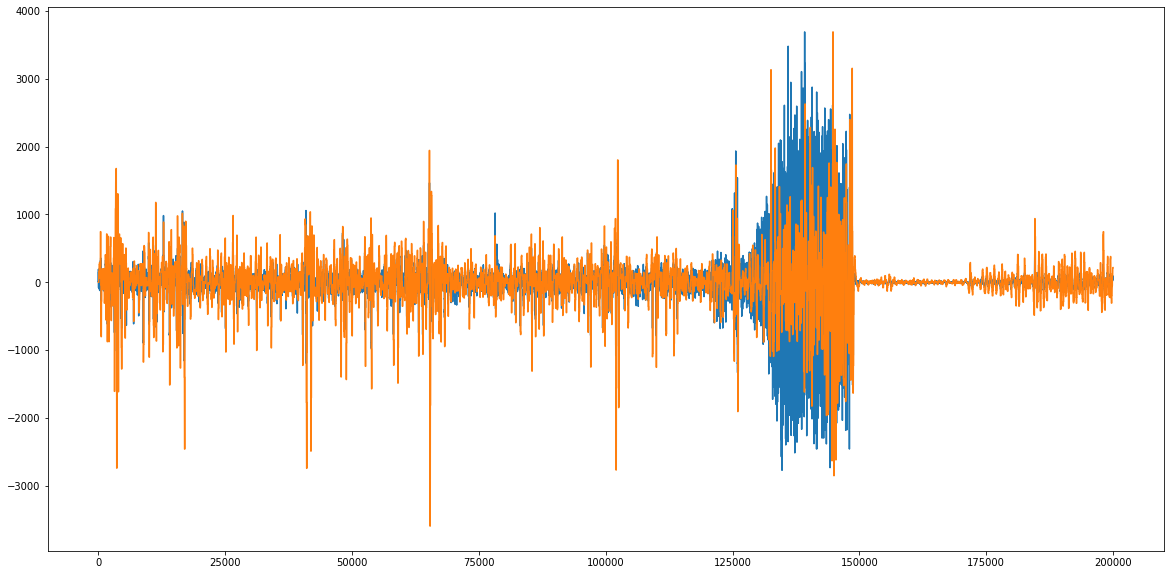

In [20]:
plt.figure(figsize=(20,10))
real_signal = eegs[0][1][max_power_eeg].T
plt.plot(real_signal[:200000])
plt.plot(moving_avg_seizure1_single_scaled[:200000]/np.max(moving_avg_seizure1_single_scaled)*np.max(real_signal))

# Calculate metrics according to the threshold value

# Plotting the functions

In [21]:
thresholds, false_alarms_energy, delays_energy, precisions_energy = compute_metrics(all_data_energy, all_data_window_ranges, window_size, step_size)

In [22]:
thresholds, false_alarms_line_length, delays_line_length, precisions_line_length = compute_metrics(all_data_line_length, all_data_window_ranges, window_size, step_size)

In [23]:
thresholds, false_alarms_moving_avg, delays_moving_avg, precisions_moving_avg = compute_metrics(all_data_moving_avg, all_data_window_ranges, window_size, step_size)

## Energy feature

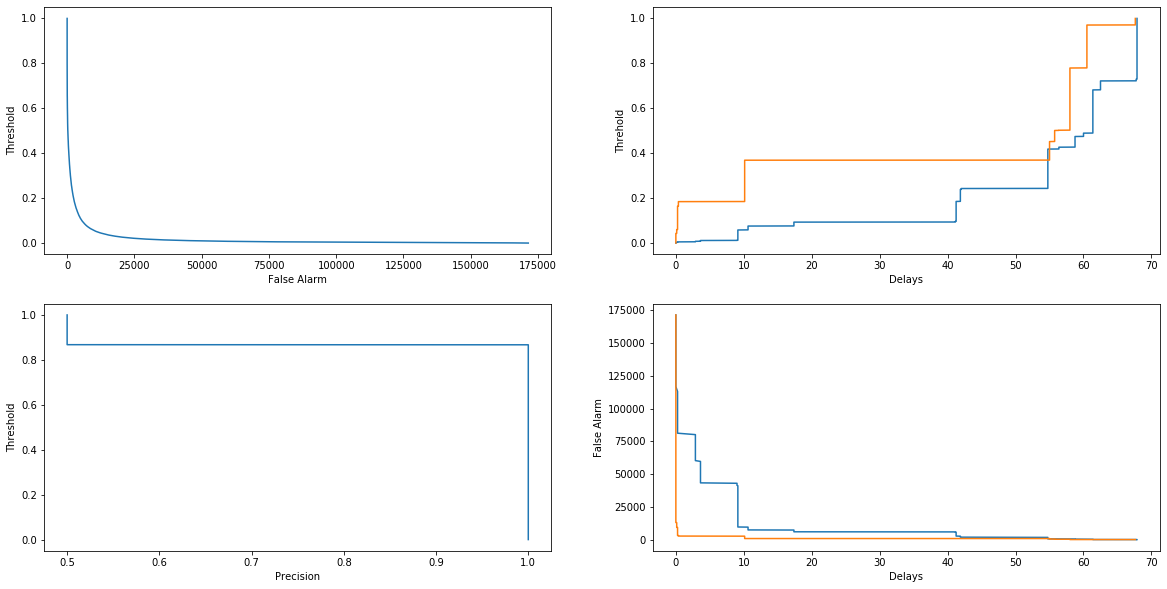

In [24]:
plt_all_metrics = plot_metrics(thresholds, false_alarms_energy, delays_energy, precisions_energy)

In [25]:
weights = (1,1,1)

In [26]:
scores_energy  = compute_score_on_seizures(thresholds, false_alarms_energy, precisions_energy, delays_energy, weights)

Max score for seizure 0 is 0.9895575179832968 for t=0.0582
FA: 9594
Delay: 9.125316851279559
Precision: 1.0

Max score for seizure 1 is 0.999857959878655 for t=0.1844
FA: 2676
Delay: 0.3750130212854613
Precision: 1.0



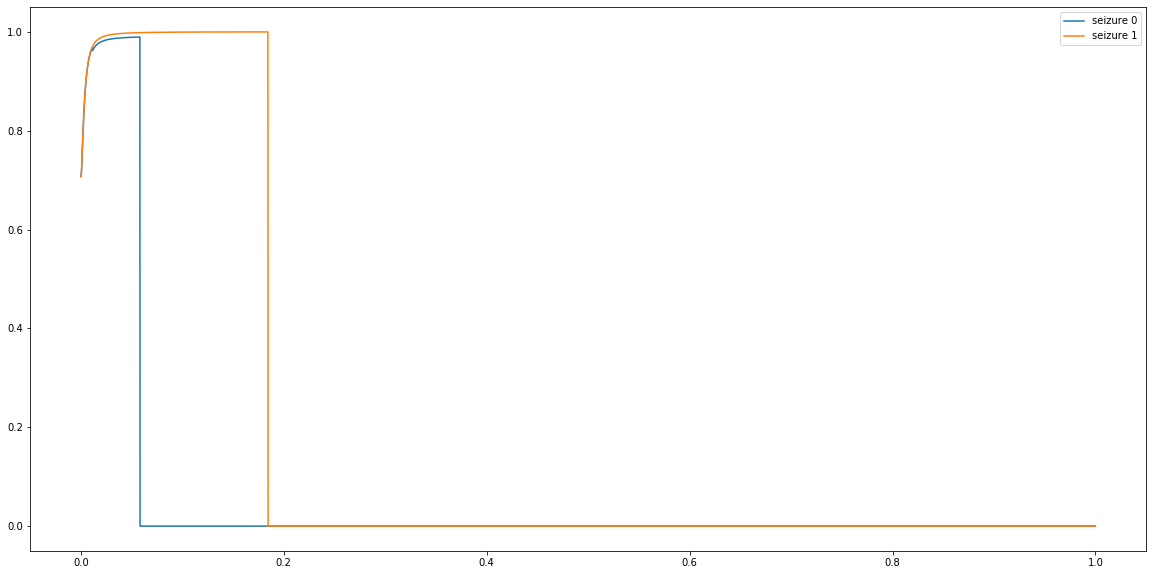

In [27]:
plot_scores(thresholds, scores_energy)

In [28]:
compute_overall_score(thresholds, scores_energy)

Distance score 0.06330983158886076
Averaged seizures score 0.994707738930976
Overall score 15.711741983309789


## Line length feature

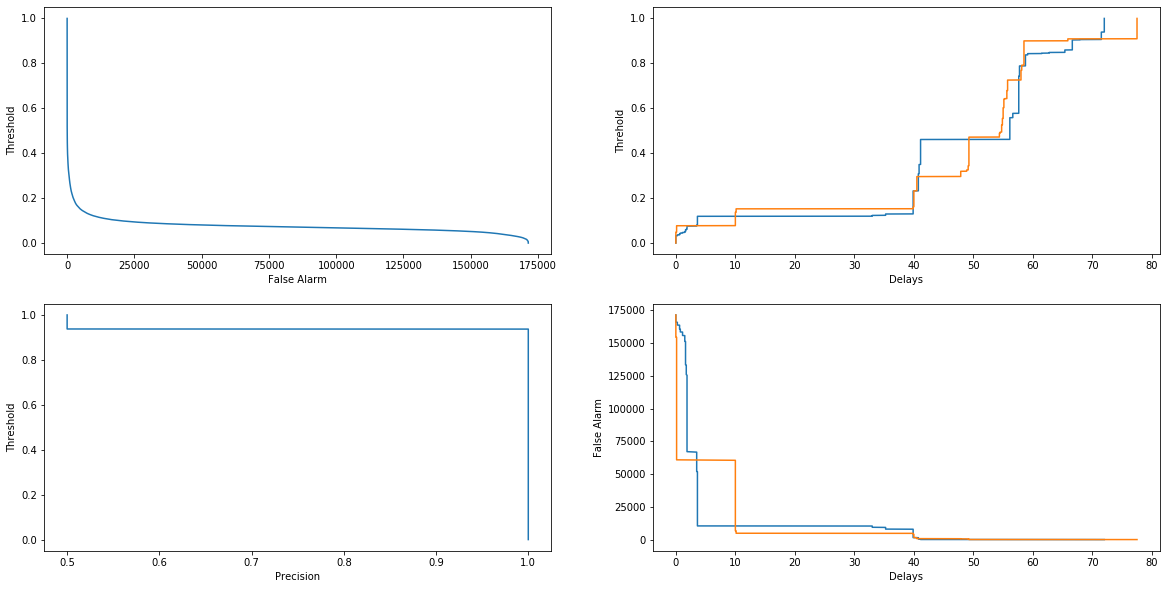

In [29]:
plt_all_metrics = plot_metrics(thresholds, false_alarms_line_length, delays_line_length, precisions_line_length)

In [30]:
scores_line_length = compute_score_on_seizures(thresholds, false_alarms_line_length, precisions_line_length, delays_line_length, weights)

Max score for seizure 0 is 0.9970675425527296 for t=0.11910000000000001
FA: 10416
Delay: 3.6251258724261257
Precision: 1.0

Max score for seizure 1 is 0.9423837819231468 for t=0.0771
FA: 60837
Delay: 0.1250043404284871
Precision: 1.0



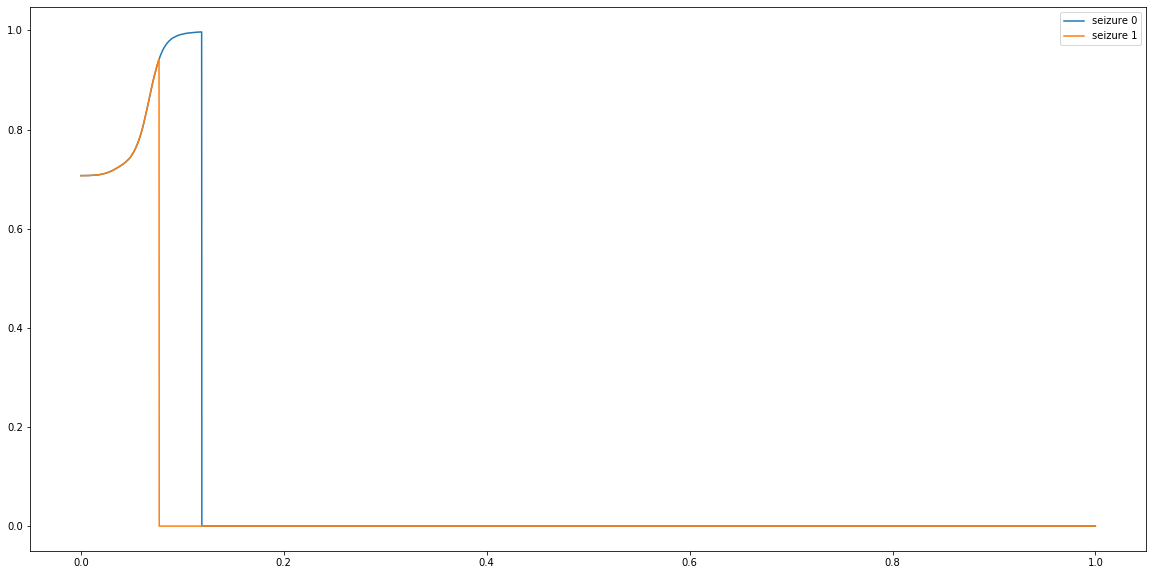

In [31]:
plot_scores(thresholds, scores_line_length)

In [32]:
compute_overall_score(thresholds, scores_line_length)

Distance score 0.034475765678928405
Averaged seizures score 0.9697256622379382
Overall score 28.127748380382883


## Moving AVG feature

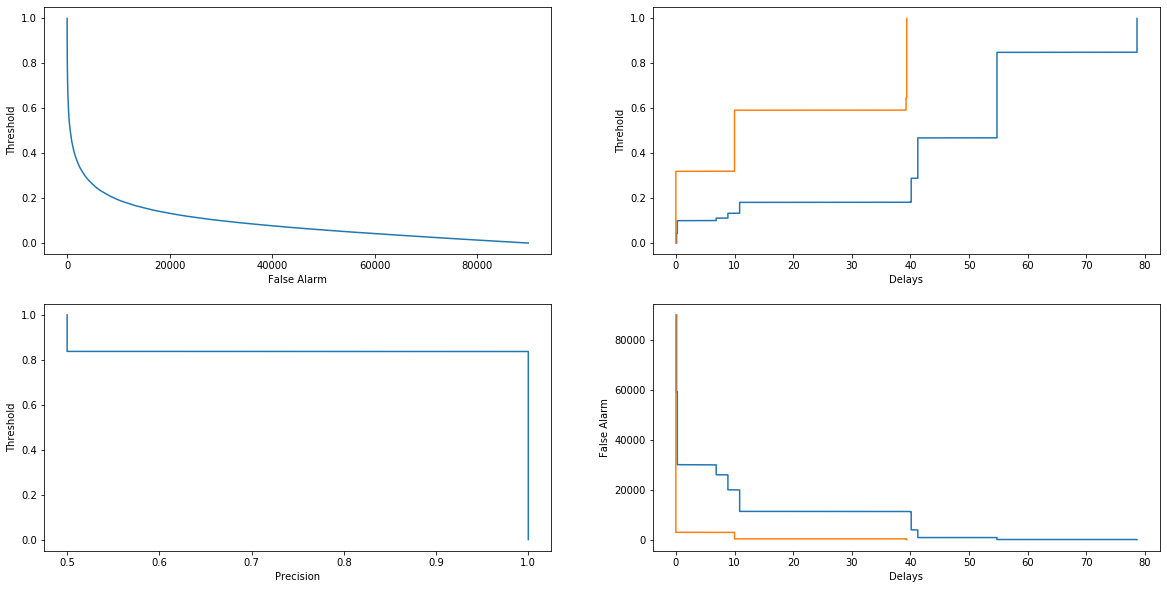

In [33]:
plt_all_metrics = plot_metrics(thresholds, false_alarms_moving_avg, delays_moving_avg, precisions_moving_avg)

In [34]:
scores_moving_avg = compute_score_on_seizures(thresholds, false_alarms_moving_avg, precisions_moving_avg, delays_moving_avg, weights)

Max score for seizure 0 is 0.9704740774734302 for t=0.13240000000000002
FA: 19920
Delay: 8.875308170422585
Precision: 1.0

Max score for seizure 1 is 0.9994711998927035 for t=0.31930000000000003
FA: 2914
Delay: 0.0
Precision: 1.0



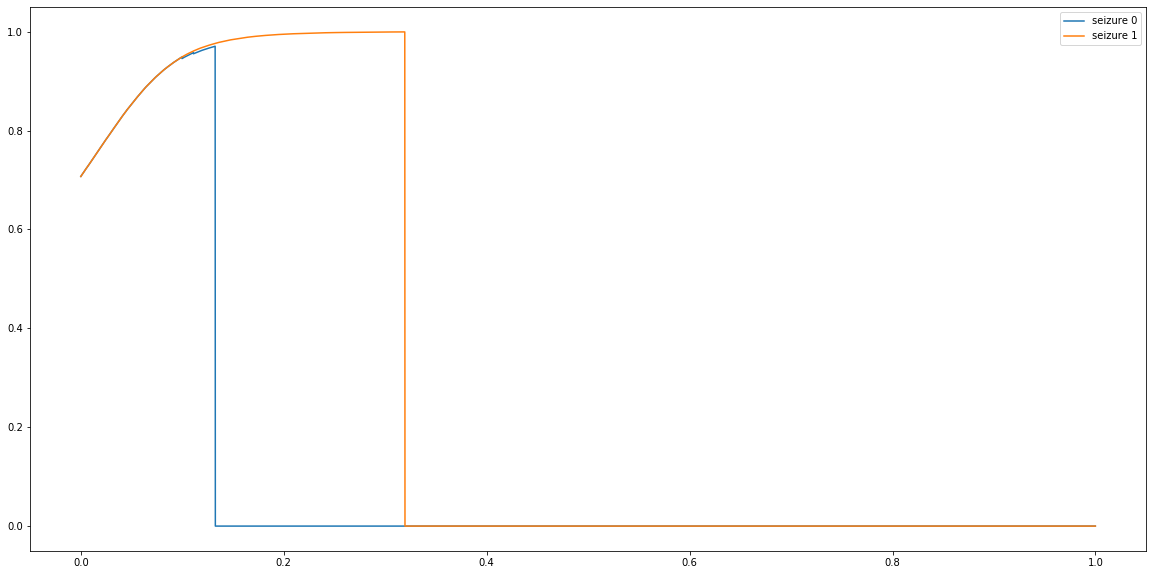

In [35]:
plot_scores(thresholds, scores_moving_avg)

In [36]:
compute_overall_score(thresholds, scores_moving_avg)

Distance score 0.094568021958533
Averaged seizures score 0.9849726386830668
Overall score 10.415493718531684
